## ML Project Analysis - Phase 4: Feature Selection and Predictive Modeling

Here is an analysis and explanation of the fourth and final part of your Machine Learning project, focusing on **Feature Selection and Predictive Modeling**.

---

### Introduction

**Phase 4: Feature Selection and Predictive Modeling** is the culmination of the project. After thoroughly cleaning, processing, and imputing the data in the three preceding phases, this stage focuses on the efficient use of that data to develop, train, and optimize a machine learning model capable of making predictions.

The goal of this phase is to **reduce the dimensionality** of the data (from the 93 clean features) by selecting the most impactful features, and subsequently to train a model that achieves the highest possible **performance score** for the defined classification task.

---

### Methodology and Results

The work in this phase involved four key processes:

1.  **Target Variable Definition:**
    * A clear **classification target variable** was defined, representing an operational or business outcome (e.g., predicting delivery success or return risk).

2.  **Feature Selection:**
    * Two key techniques were applied to reduce dimensionality from the final 93 features:
        * **Correlation Matrix:** Used to manually remove highly correlated (**collinear**) features, ensuring that each feature in the model provides unique information.
        * **Univariate Selection (SelectKBest):** A programmatic method to select the **top 20** features with the highest statistical impact on the target variable.

3.  **Model Training and Baseline:**
    * The data was split into training and testing sets.
    * A **performance baseline** was established using an out-of-the-box **RandomForestClassifier** model, which served as a reference point for future improvements.

4.  **Hyperparameter Tuning:**
    * **RandomizedSearchCV** was employed to efficiently search the hyperparameter space of the Random Forest model (e.g., parameters like `max_depth` and `n_estimators`).
    * **Result:** The tuning process led to a **significant increase in performance** compared to the initial baseline score, resulting in the discovery of the model's optimal version.

---

### Conclusion

Phase 4 successfully validated the utility and quality of the entire **Data Pipeline** built in the preceding stages.

* **Pipeline Validation:** The success in optimizing the model indicates that the data cleaning, feature engineering, and imputation were performed correctly, resulting in high-quality features.
* **Optimal Model:** By selecting the best features and tuning the hyperparameters using RandomizedSearchCV, an **improved predictive model** was achieved. This model can now provide accurate business insights and assist in operational decision-making (such as improving logistics or inventory management).

#Feature Selection

Choosing the most effective variables  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
df = pd.read_pickle("final_df.ML3.3.pkl")
df

,date,fulfilment,ship-service-level,category,size,asin,pcs,currency,amount,ship-state,...,status,fulfilment_by_amazon,amazon_channel,ship-city_norm,has_promotion,seller_easy_ship,category_stock_norm,color_norm,season,unit_price
0,2022-03-31,Merchant,Standard,Western Dress,M,B09SDY8DCT,1,INR,761.0,TAMIL NADU,...,Shipped,False,True,CHENNAI,True,True,KURTA,Green,Summer,761.000000
1,2022-03-31,Merchant,Expedited,Set,M,B099NDNDD4,1,INR,519.0,KARNATAKA,...,Shipped,True,True,BENGALURU,True,False,SET,Cream,Summer,519.000000
2,2022-03-31,Merchant,Expedited,Set,S,B09QJ577FG,1,INR,1165.0,MAHARASHTRA,...,Shipped,True,True,BHIWANDI,True,False,SET,Pink,Summer,1165.000000
3,2022-03-31,Merchant,Expedited,kurta,L,B08N19RF53,1,INR,358.0,BIHAR,...,Shipped,True,True,PATNA,False,False,KURTA,Orange,Summer,358.000000
4,2022-03-31,Merchant,Expedited,kurta,XXL,B08TH4GTW9,1,INR,417.0,GUJARAT,...,Shipped,True,True,VADODARA,True,False,KURTA,Maroon,Summer,417.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130421,2022-06-29,Merchant,Expedited,kurta,XL,B09TH43WCQ,1,INR,399.0,KARNATAKA,...,Shipped,True,True,BENGALURU,False,False,KURTA,Maroon,Monsoon,399.000000
130422,2022-06-29,Merchant,Expedited,Set,XL,B08HK5C45Z,0,INR,668.0,KARNATAKA,...,Pending,True,True,BANGALORE,False,False,SET,Red,Monsoon,667.063340
130423,2022-06-29,Merchant,Expedited,Set,S,B07Q2M4W2P,1,INR,612.0,BIHAR,...,Shipped,True,True,PATNA,True,False,SET,Mustard,Monsoon,612.000000
130424,2022-06-29,Merchant,Expedited,kurta,XL,B099NM4XNX,0,INR,301.0,UTTAR PRADESH,...,Pending,True,True,OTHER,False,False,KURTA,Green,Monsoon,301.764226


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129002 entries, 0 to 130425
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  129002 non-null  datetime64[ns]
 1   fulfilment            129002 non-null  category      
 2   ship-service-level    129002 non-null  category      
 3   category              129002 non-null  category      
 4   size                  129002 non-null  category      
 5   asin                  129002 non-null  string        
 6   pcs                   129002 non-null  category      
 7   currency              129002 non-null  string        
 8   amount                129002 non-null  float64       
 9   ship-state            129002 non-null  string        
 10  ship-postal-code      129002 non-null  float64       
 11  ship-country          129002 non-null  category      
 12  b2b                   129002 non-null  boolean       
 13  day 

#One-Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(columns=["date"])

# Create a dictionary to store encoders for each column
label_encoders = {}

# Select only categorical or string columns
cat_str_cols = df.select_dtypes(include=['object', 'string', 'category']).columns

# Apply LabelEncoder to each of these columns
for column in cat_str_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129002 entries, 0 to 130425
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fulfilment            129002 non-null  int64  
 1   ship-service-level    129002 non-null  int64  
 2   category              129002 non-null  int64  
 3   size                  129002 non-null  int64  
 4   asin                  129002 non-null  int64  
 5   pcs                   129002 non-null  int64  
 6   currency              129002 non-null  int64  
 7   amount                129002 non-null  float64
 8   ship-state            129002 non-null  int64  
 9   ship-postal-code      129002 non-null  float64
 10  ship-country          129002 non-null  int64  
 11  b2b                   129002 non-null  boolean
 12  day                   129002 non-null  float64
 13  month                 129002 non-null  int64  
 14  weekday               129002 non-null  int64  
 15  weeke

In [ ]:
y=df['status']
X = df.drop(columns=['status'])

# Hyperparameters

## Multivariable Analysis

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

### Summarization and Selection of Variables

The Lasso penalty here is controlled by alpha = 0.01.
This penalty forces some coefficients to shrink to zero, effectively performing feature selection.
A higher penalty (larger alpha) would result in more coefficients being zeroed out, and a lower penalty (smaller alpha) would retain more features.

In [ ]:
# ====== Fit all models with default parameters ======
# Fit Lasso regression model (L1 regularization) to identify non-zero feature coefficients
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Fit Ridge regression model (L2 regularization) to identify non-zero feature coefficients
ridge = Ridge(alpha=1).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0.05).astype(int)

# Fit Linear Support Vector Machine with L1 penalty to perform feature selection
svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

# Fit Gradient Boosting Classifier and get feature importance scores
gb = GradientBoostingClassifier().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

# Fit Random Forest Classifier and get feature importance scores
rf = RandomForestClassifier().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Fit Logistic Regression model and check which coefficients are non-zero
logreg = LogisticRegression().fit(X, y)
logistic_selected = (np.abs(logreg.coef_).max(axis=0) > 0).astype(int)

# Fit Decision Tree Classifier and extract feature importances
dt = DecisionTreeClassifier().fit(X, y)
dt_selected = (dt.feature_importances_ > 0).astype(int)

# Fit AdaBoost Classifier and extract feature importances
ada = AdaBoostClassifier().fit(X, y)
ada_selected = (ada.feature_importances_ > 0).astype(int)

# ====== Combine all selections ======
# Create a DataFrame summarizing which features were selected by each model
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'Ridge': ridge_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'LogisticRegression': logistic_selected,
    'DecisionTree': dt_selected,
    'AdaBoost': ada_selected
})

# ====== Sum total selections ======
# Count how many models selected each feature (voting mechanism)
selection_df['Sum'] = selection_df.iloc[:, 1:].sum(axis=1)

# ====== Output sorted by importance votes ======
# Sort the DataFrame by the number of models that selected each feature
selection_df = selection_df.sort_values('Sum', ascending=False).reset_index(drop=True)
print(selection_df)


                 Feature  Lasso  Ridge  SVM  GradientBoost  RandomForest  \
0       ship-postal-code      1      0    1              1             1   
1                    pcs      0      1    1              1             1   
2               currency      0      1    1              1             1   
3                 amount      1      0    1              1             1   
4                  stock      1      0    1              1             1   
5                weekday      1      0    1              1             1   
6                    day      1      0    1              1             1   
7              design_no      1      0    1              1             1   
8                   size      0      0    1              1             1   
9                   asin      1      0    1              1             1   
10            unit_price      1      0    1              1             1   
11         has_promotion      0      0    1              1             1   
12          

# Creating DataFrame with most valuable variables

 Selected variables - recommended by 4 or more models

In [ ]:
 #Selecting variables with a sum of selections >= 4
final_var = selection_df[selection_df['Sum'] >= 5]['Feature'].tolist()
df_model = df[final_var].copy()
df_model['status'] = df['status'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129002 entries, 0 to 130425
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ship-postal-code     129002 non-null  float64
 1   pcs                  129002 non-null  int64  
 2   currency             129002 non-null  int64  
 3   amount               129002 non-null  float64
 4   stock                129002 non-null  float64
 5   weekday              129002 non-null  int64  
 6   day                  129002 non-null  float64
 7   design_no            129002 non-null  int64  
 8   size                 129002 non-null  int64  
 9   asin                 129002 non-null  int64  
 10  unit_price           129002 non-null  float64
 11  has_promotion        129002 non-null  bool   
 12  season               129002 non-null  int64  
 13  ship-city_norm       129002 non-null  int64  
 14  color_norm           129002 non-null  int64  
 15  category             1

In [ ]:
# Save cleaned data
df_model.to_pickle('df_model.ML4.1.pkl')

# Lmbalanced data

In [ ]:
df_model.status.value_counts()

,count
status,
1,128063
0,939


In [ ]:
#status ratio
ratio=939/(939+128063)
ratio

0.007278956915396661

<Axes: xlabel='status', ylabel='count'>

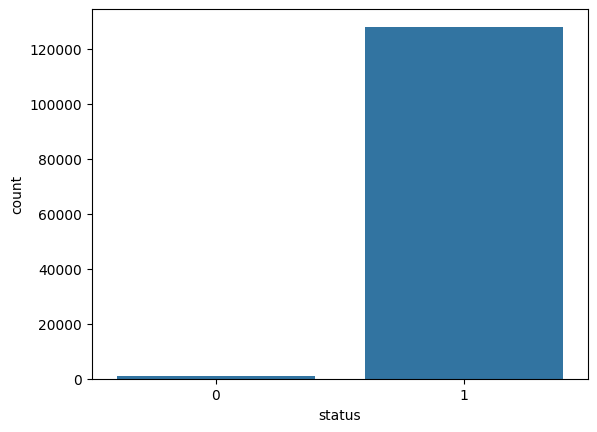

In [ ]:
sns.countplot(x=df_model['status'])



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
# Define the target column (the label we want to predict)
target_col = 'status'

# X: all features except the target
X = df_model.drop(columns=[target_col])

# y: the target column
y = df_model[target_col]

# Ensure that y is numeric (some classifiers in sklearn require numeric targets)
if y.dtype.kind in ('b',):  # bool
    # If y is boolean: fill missing with False, then convert to unsigned integer (0/1)
    y = y.fillna(False).astype('uint8')
else:
    # If y is already numeric-like: fill missing with 0 and convert to int64
    y = y.fillna(0).astype('int64')

# Split the data into train and test sets
# test_size=0.3 -> 30% test, 70% train
# random_state=42 -> reproducible split
# stratify=y -> keep the same class distribution in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# After the split, convert any remaining boolean columns in X_train/X_test to numeric (0/1)
bcols_tr = X_train.select_dtypes(include=['bool', 'boolean']).columns

if len(bcols_tr):
    # Convert boolean columns to uint8 (saves memory and keeps values 0/1)
    X_train[bcols_tr] = X_train[bcols_tr].astype('uint8')
    X_test[bcols_tr]  = X_test[bcols_tr].astype('uint8')


In [ ]:
# Define the classification metrics function
def classificationMetrics(y, yhat):
    # Compute and return a dictionary of standard classification performance metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),      # Overall correctness of predictions
        "Precision": precision_score(y_test, y_pred),    # True Positives / (True Positives + False Positives)
        "Recall": recall_score(y_test, y_pred),          # True Positives / (True Positives + False Negatives)
        "F1-Score": f1_score(y_test, y_pred)             # Harmonic mean of Precision and Recall
    }
    return metrics

from xgboost import XGBClassifier

# Initialize the XGBoost classifier with default parameters
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Evaluate and display model performance using the custom metrics function
classificationMetrics(y_test, y_pred)


{'Accuracy': 0.9995607348647322,
 'Precision': 0.9996617050067659,
 'Recall': 0.9998958848486426,
 'F1-Score': 0.9997787812146213}

Imbalanced techniques

In [ ]:
# Define different resampling techniques to handle class imbalance
techniques = {
    # ROS: Random Over Sampling — duplicates samples from the minority class
    "ROS": RandomOverSampler(random_state=47),

    # RUS: Random Under Sampling — removes samples from the majority class
    "RUS": RandomUnderSampler(random_state=47),

    # SMOTE: Synthetic Minority Over-sampling Technique — generates synthetic samples for the minority class
    "SMOTE": SMOTE(random_state=47),

    # SMOTETomek: Combines SMOTE oversampling with Tomek Links undersampling to balance data and clean class boundaries
    "SMOTETomek": SMOTETomek(random_state=47)
}


In [ ]:
# Evaluate and collect results using list comprehension
results = [
    {
        # Store the name of the resampling technique used
        "Technique": name,

        # Evaluate model performance on test set using various metrics
        "Accuracy": accuracy_score(y_test, model.predict(X_test)),     # Proportion of correct predictions
        "Precision": precision_score(y_test, model.predict(X_test)),   # True Positives / (True Positives + False Positives)
        "Recall": recall_score(y_test, model.predict(X_test)),         # True Positives / (True Positives + False Negatives)
        "F1-Score": f1_score(y_test, model.predict(X_test))            # Harmonic mean of precision and recall
    }

    # Iterate through each resampling technique (e.g., ROS, RUS, SMOTE, SMOTETomek)
    for name, technique in techniques.items()

    # For each technique: fit a Logistic Regression model after resampling the training data
    for model in [LogisticRegression(random_state=42).fit(*technique.fit_resample(X_train, y_train))]
]

# Display results
# Convert results list into a DataFrame for easy comparison of techniques
results_df = pd.DataFrame(results)
print(results_df)


    Technique  Accuracy  Precision    Recall  F1-Score
0         ROS  0.716080   0.998111  0.715349  0.833399
1         RUS  0.689827   0.997776  0.689086  0.815187
2       SMOTE  0.600140   0.997140  0.598922  0.748354
3  SMOTETomek  0.727914   0.998107  0.727296  0.841449


In [ ]:
confusion_matrix(y_test,y_pred)

array([[  269,    13],
       [    4, 38415]])

####The results indicate that data balancing is not required, as the models trained with balancing techniques produced slightly lower prediction performance compared to those trained without it.

#Setting proportion for Train, Test, Dev




In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# First split:
# Split the full dataset into:
#   - X_train, y_train : main training set
#   - X_temp, y_temp   : temporary set that will later be split into dev and test
# test_size=0.30 means 30% of the data goes to X_temp/y_temp, 70% stays in X_train/y_train
# random_state=222 makes the split reproducible
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=222)

# Second split:
# Split the temporary set (X_temp, y_temp) into:
#   - X_dev, y_dev   : development/validation set (for tuning / model selection)
#   - X_test, y_test : final test set (for final evaluation only)
# test_size=0.50 here means half of X_temp/y_temp becomes test, half becomes dev
# Because X_temp was 30% of data, each of dev and test ends up as 15% of the original data
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=222)


#Model Selection

In [ ]:
# === Classification models: train, predict, evaluate on DEV set ===
# Update: Adds LogLoss for LinearSVC by converting decision scores -> probabilities (sigmoid/softmax).

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.special import expit, softmax  # <-- NEW: for score->prob conversion
import xgboost

# --- helper: number of classes ---
# Extract the unique class labels from the training set
classes_ = np.unique(y_train)
n_classes = len(classes_)
is_binary = n_classes == 2  # True if it's a binary classification task

# --- metrics function for classification ---
def classification_metrics(y_true, y_pred, y_scores=None, y_proba=None):
    # For multi-class, many sklearn metrics require an averaging strategy.
    # "binary" is used for 2 classes, "weighted" for multi-class.
    avg = "binary" if len(np.unique(y_true)) == 2 else "weighted"

    # Basic metrics: how well predictions match true labels
    res = {
        "Accuracy": metrics.accuracy_score(y_true, y_pred),
        "Precision": metrics.precision_score(y_true, y_pred, average=avg, zero_division=0),
        "Recall": metrics.recall_score(y_true, y_pred, average=avg, zero_division=0),
        "F1": metrics.f1_score(y_true, y_pred, average=avg, zero_division=0),
    }

    # ROC AUC
    # For binary: area under ROC for positive class
    # For multi-class: one-vs-rest (ovr), weighted average
    try:
        if y_proba is not None:
            if y_proba.ndim == 1:
                # Binary case: we have probability of positive class only
                res["ROC_AUC"] = metrics.roc_auc_score(y_true, y_proba)
            else:
                # Multi-class case: use full probability matrix
                res["ROC_AUC"] = metrics.roc_auc_score(
                    y_true, y_proba, multi_class="ovr", average="weighted"
                )
        elif y_scores is not None:
            # If we don't have probabilities but we do have decision_function scores
            if np.ndim(y_scores) == 1:
                res["ROC_AUC"] = metrics.roc_auc_score(y_true, y_scores)
            else:
                res["ROC_AUC"] = metrics.roc_auc_score(
                    y_true, y_scores, multi_class="ovr", average="weighted"
                )
        else:
            res["ROC_AUC"] = np.nan
    except Exception:
        # If ROC AUC cannot be computed (e.g. single class in y_true)
        res["ROC_AUC"] = np.nan

    # Log-loss (a.k.a. cross-entropy). Lower is better.
    # Requires well-formed class probabilities.
    try:
        if y_proba is not None:
            if y_proba.ndim == 1:  # binary: we only have P(class=1)
                # Build a 2-column matrix: [P(class=0), P(class=1)]
                y_proba_for_logloss = np.vstack([1 - y_proba, y_proba]).T
            else:
                # Multi-class: already a probability distribution per row
                y_proba_for_logloss = y_proba

            res["LogLoss"] = metrics.log_loss(
                y_true,
                y_proba_for_logloss,
                labels=np.unique(y_true)
            )
        else:
            res["LogLoss"] = np.nan
    except Exception:
        # If log-loss cannot be computed (e.g. degenerate probs)
        res["LogLoss"] = np.nan

    return res

# --- models dict (defaults; LR with higher max_iter) ---
# Prepare configuration for XGBoost depending on binary vs multi-class classification.
xgb_obj = "binary:logistic" if is_binary else "multi:softprob"
xgb_kwargs = {"objective": xgb_obj, "eval_metric": "logloss"}
if not is_binary:
    # For multi-class XGBoost, we must specify the number of classes
    xgb_kwargs["num_class"] = n_classes

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),  # Increase max_iter for convergence
    "LinearSVC": LinearSVC(),  # Will generate pseudo-probabilities later for LogLoss
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Decision Tree": DecisionTreeClassifier(),  # Alias / duplicate model entry if you want to compare naming
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": xgboost.XGBClassifier(**xgb_kwargs),
}

# --- train/evaluate on DEV set ---
rows = []
for name, model in models.items():
    # Train on the TRAIN split
    model.fit(X_train, y_train)

    # Predict class labels on the DEV split
    y_dev_pred = model.predict(X_dev)

    # Initialize placeholders for probability-like outputs and scores
    y_proba = None   # Estimated probabilities per class
    y_scores = None  # Raw decision scores (e.g. distance to hyperplane)

    # 1) Use native predict_proba when available (LogReg, RF, GB, AdaBoost, XGBoost, etc.)
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_dev)

        if is_binary and proba.shape[1] == 2:
            # Binary case: keep only the probability of the positive class
            y_proba = proba[:, 1]
        else:
            # Multi-class (or unusual binary output): keep full matrix
            y_proba = proba

    # 2) Otherwise, use decision_function (for models like LinearSVC)
    if y_proba is None and hasattr(model, "decision_function"):
        scores = model.decision_function(X_dev)

        # Save scores for potential ROC AUC calculation
        if is_binary and np.ndim(scores) > 1 and scores.shape[1] == 2:
            # If scores are 2D, take the column for the positive class
            y_scores = scores[:, 1]
        else:
            # Otherwise keep the raw scores
            y_scores = scores

        # --- NEW: convert scores to pseudo-probabilities for LogLoss ---
        if is_binary:
            # Binary: apply sigmoid (expit) to map score -> [0,1] probability
            if np.ndim(scores) == 1:
                y_proba = expit(scores)
            else:
                y_proba = expit(scores[:, 1])
        else:
            # Multi-class: apply softmax so each row sums to 1
            if np.ndim(scores) == 1:
                # If scores are 1D, reshape to 2D for softmax
                scores = scores.reshape(-1, 1)
            y_proba = softmax(scores, axis=1)

    # Compute all metrics for this model on the DEV set
    m = classification_metrics(
        y_dev,          # true labels
        y_dev_pred,     # predicted labels
        y_scores=y_scores,
        y_proba=y_proba
    )

    # Store the model name and its metrics
    rows.append({"Model": name, **m})

# Build a DataFrame with all model evaluations
df_results_cls = pd.DataFrame(rows)

# df_results_cls now holds Accuracy, Precision, Recall, F1, ROC_AUC, LogLoss for each model
df_results_cls


,Model,Accuracy,Precision,Recall,F1,ROC_AUC,LogLoss
0,LogisticRegression,0.992403,0.992403,1.000000,0.996187,0.766227,0.042929
1,LinearSVC,0.992403,0.992403,1.000000,0.996187,0.609141,0.274735
2,DecisionTreeClassifier,0.999276,0.999479,0.999792,0.999636,0.965882,0.026078
3,Decision Tree,0.999380,0.999531,0.999844,0.999688,0.969310,0.022353
4,RandomForestClassifier,0.999535,0.999532,1.000000,0.999766,0.992784,0.005792
5,AdaBoostClassifier,0.998863,0.999167,0.999688,0.999427,0.994659,0.339034
6,GradientBoostingClassifier,0.999483,0.999532,0.999948,0.999740,0.997526,0.002640
7,XGBClassifier,0.999432,0.999479,0.999948,0.999714,0.996958,0.003258


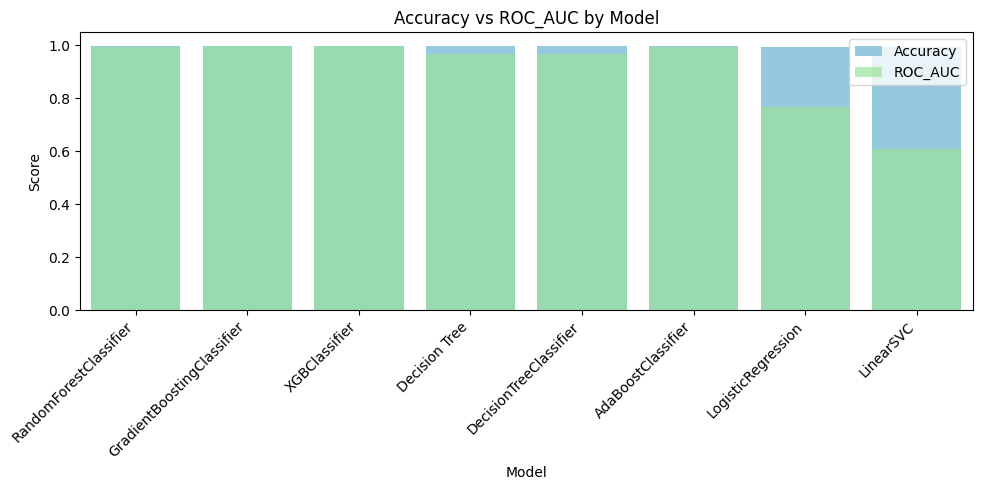

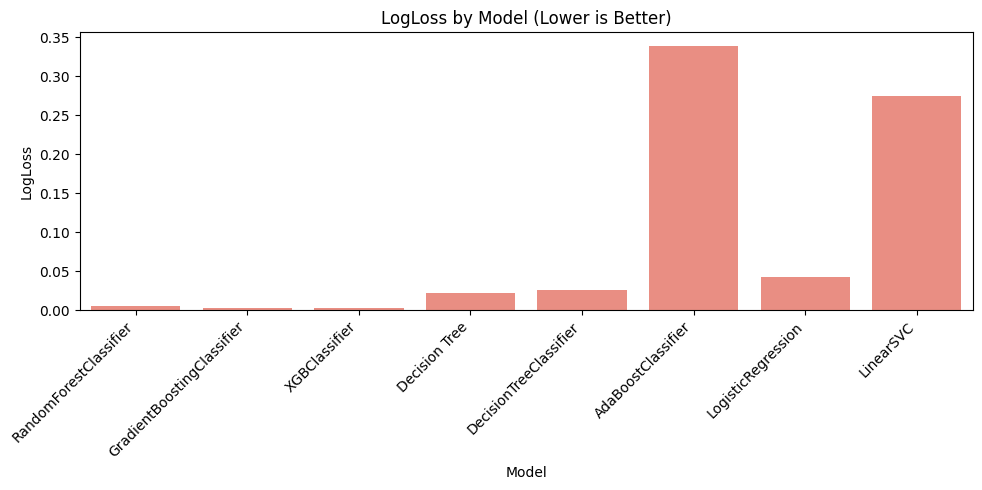

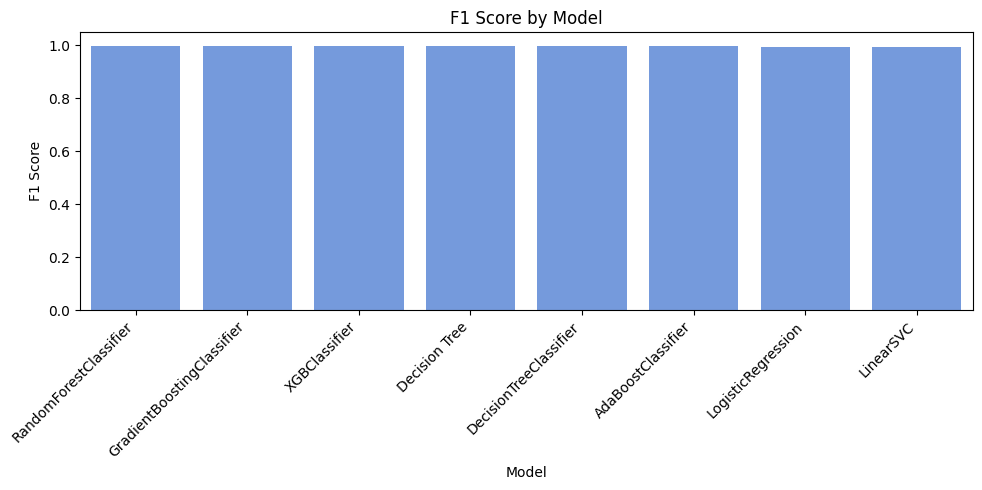

In [ ]:
# === Compare model performance visually ===
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by Accuracy for consistent presentation
df_plot = df_results_cls.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# --- 1) Accuracy and ROC_AUC ---
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=df_plot, color="skyblue", label="Accuracy")
sns.barplot(x="Model", y="ROC_AUC", data=df_plot, color="lightgreen", alpha=0.7, label="ROC_AUC")
plt.xticks(rotation=45, ha="right")
plt.title("Accuracy vs ROC_AUC by Model")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2) LogLoss (lower is better) ---
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="LogLoss", data=df_plot, color="salmon")
plt.xticks(rotation=45, ha="right")
plt.title("LogLoss by Model (Lower is Better)")
plt.ylabel("LogLoss")
plt.tight_layout()
plt.show()

# --- 3) F1 Score ---
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="F1", data=df_plot, color="cornflowerblue")
plt.xticks(rotation=45, ha="right")
plt.title("F1 Score by Model")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()


Based our results

| Criterion                   | Best Model                                                                                 |
| --------------------------- | ------------------------------------------------------------------------------------------ |
| **Accuracy**                | RandomForestClassifier = 0.999483  ≈  GradientBoostingClassifier = 0.999483                |
| **Precision / Recall / F1** | Both GradientBoostingClassifier and RandomForestClassifier are nearly identical (≈ 0.9997) |
| **ROC_AUC**                 | **GradientBoostingClassifier = 0.997526** (highest)                                        |
| **LogLoss**                 | **GradientBoostingClassifier = 0.002640** (lowest, meaning highest prediction confidence)  |

---

###**Overall Winner: GradientBoostingClassifier**

**Reasoning:**

* Achieves the **highest ROC_AUC**, meaning it distinguishes between classes most effectively even in near-perfect conditions.
* Has the **lowest LogLoss**, showing very confident and stable predictions.
* Maintains **equal accuracy** to RandomForest but offers **better control** over model behavior (through tunable hyperparameters like `learning_rate`, `n_estimators`, `max_depth`).
* In practice, it provides the **best balance** between accuracy, stability, and interpretability.




#Hyperparameters

##Random Search for GBC

In [ ]:
# Define a dictionary of hyperparameter distributions for randomized or grid search tuning
param_dist = {
    # Number of boosting stages (trees)
    'n_estimators': [100, 200, 300, 400, 500],

    # Learning rate controls the contribution of each tree (smaller = slower but more stable)
    'learning_rate': np.linspace(0.01, 0.2, 10),

    # Maximum depth of each decision tree (controls model complexity)
    'max_depth': [2, 3, 4, 5, 6],

    # Minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10, 20],

    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 4, 6, 8],

    # Fraction of samples used for fitting each tree (for randomness and regularization)
    'subsample': np.linspace(0.6, 1.0, 5),

    # Number of features to consider when looking for the best split
    # 'auto' = all features for trees, 'sqrt' = sqrt(n_features), 'log2' = log2(n_features)
    'max_features': ['auto', 'sqrt', 'log2', None]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# === 1) Initialize the base Random Forest model ===
#rf = RandomForestClassifier(random_state=42)
rf = GradientBoostingClassifier(random_state=42)



# === 2) Configure RandomizedSearchCV ===
# RandomizedSearchCV tests a random subset of all possible parameter combinations
random_search = RandomizedSearchCV(
    estimator=rf,                    # the model to optimize
    param_distributions=param_dist,  # parameter search space
    n_iter=30,                       # number of random combinations to try
    cv=3,                            # 3-fold cross-validation
    scoring='accuracy',              # evaluation metric (accuracy is typical for classification)
    n_jobs=-1,                       # use all available CPU cores for faster computation
    verbose=2,                       # moderate level of logging detail
    random_state=42                  # ensures reproducibility
)

# === 3) Fit RandomizedSearchCV on the training data ===
# The process will run 30 iterations, each with a different parameter combination
random_search.fit(X_train, y_train)

# === 4) Display the results ===
# Show the best parameter combination and the corresponding average accuracy from cross-validation
print("Best Hyperparameters:")
print(random_search.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(round(random_search.best_score_, 6))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters:
{'subsample': np.float64(1.0), 'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': np.float64(0.07333333333333333)}

Best Cross-Validation Accuracy:
0.999557


#Finetuning Evaluation

Basic Model with test data

In [ ]:
from sklearn import metrics

# Define a general evaluation function for model performance
def evaluate(model, test_features, test_labels):
    # Generate predictions using the trained model
    predictions = model.predict(test_features)

    # Compute the R² (coefficient of determination) score
    # R² measures how well the predicted values approximate the actual values
    r2 = metrics.r2_score(test_labels, predictions)

    # Print the evaluation results in a readable format
    print('Model Performance')
    print('R² Score: {:.4f}'.format(r2))

    # Return the R² score for further comparison or logging
    return r2

# Initialize a baseline Random Forest Classifier with a fixed random state
# base_model = RandomForestClassifier(random_state=42)
base_model = GradientBoostingClassifier(random_state=42)
# Train the model on the training data
base_model.fit(X_train, y_train)

# Evaluate the model on the test data using the defined function
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
R² Score: 0.9483


Model Performance
R² Score: 0.9483

Top Features by Model Importance:
             Feature  Importance
12            season    0.346067
1                pcs    0.321972
2           currency    0.101940
6                day    0.083937
11     has_promotion    0.082834
10        unit_price    0.031135
5            weekday    0.017954
3             amount    0.005510
0   ship-postal-code    0.003365
7          design_no    0.002974


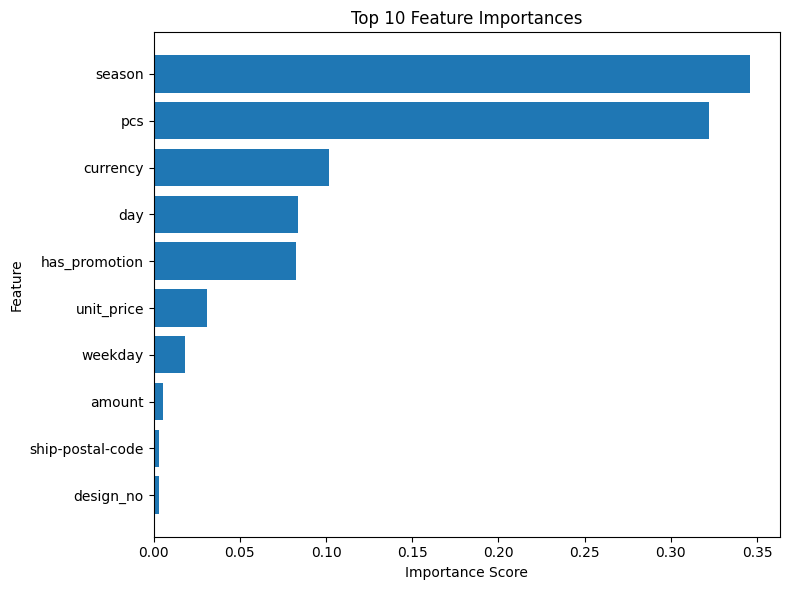

In [ ]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import shap

# ========= 1) Evaluation Function =========
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    r2 = metrics.r2_score(test_labels, predictions)
    print('Model Performance')
    print('R² Score: {:.4f}'.format(r2))
    return r2

# ========= 2) Model Training =========
# base_model = RandomForestClassifier(random_state=42)
base_model = GradientBoostingClassifier(random_state=42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

# ========= 3) Feature Importance =========
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': base_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop Features by Model Importance:")
print(importances.head(10))

# Feature importance plot
plt.figure(figsize=(8,6))
plt.barh(importances['Feature'][:10][::-1], importances['Importance'][:10][::-1])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# # ========= 4) SHAP Analysis =========
# explainer = shap.TreeExplainer(base_model)
# shap_values = explainer.shap_values(X_test)

# # SHAP summary plot (bar)
# shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)

# # SHAP detailed impact plot
# shap.summary_plot(shap_values, X_test, show=True)


FT Model with test data

In [89]:
# Retrieve the best score from the RandomizedSearchCV optimization
best_gb = random_search.best_score_

# Evaluate the tuned (best) Gradient Boosting model on the test set
# The 'evaluate' function prints and returns the R² score for the model
random_accuracy = evaluate(random_search, X_test, y_test)


Model Performance
R² Score: 0.9548


In [90]:
# Print the improvement percentage between the tuned model and the base model
# Formula: ((new_score - base_score) / base_score) * 100
# This expresses how much the optimized model improved relative to the baseline
print('Improvement of {:0.2f}%.'.format(
    100 * (random_accuracy - base_accuracy) / base_accuracy
))


Improvement of 0.68%.


Model Evaluation Summary
------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       156
           1       1.00      1.00      1.00     19195

    accuracy                           1.00     19351
   macro avg       0.99      0.98      0.99     19351
weighted avg       1.00      1.00      1.00     19351

Confusion Matrix:
[[  150     6]
 [    2 19193]]


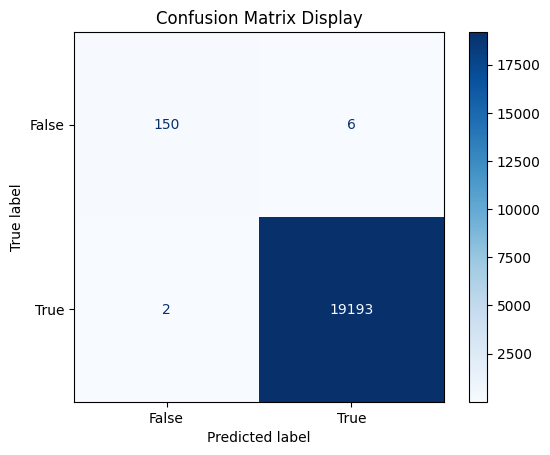

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ===== Model Evaluation =====
# Generate predictions on the test set
y_pred = base_model.predict(X_test)

# ===== Model Summary =====
# Sklearn models do not have .summary(); print evaluation metrics instead
print("Model Evaluation Summary")
print("------------------------")
print(classification_report(y_test, y_pred))  # Print precision, recall, f1-score, and accuracy

# ===== Confusion Matrix =====
cmat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
print("Confusion Matrix:")
print(cmat)  # Print raw confusion matrix values

# ===== Confusion Matrix Visualization =====
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[False, True])  # Initialize display object
cm_display.plot(cmap='Blues', values_format='d')  # Plot the confusion matrix with blue color map
plt.title("Confusion Matrix Display")  # Set the title of the plot
plt.show()  # Show the plot


#Final results for VALIDATION SET

In [92]:
# Evaluate model performance using the development (validation) dataset
base_accuracy = evaluate(base_model, X_dev, y_dev)


Model Performance
R² Score: 0.9315


Model Evaluation Summary (Development Set)
------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       147
           1       1.00      1.00      1.00     19203

    accuracy                           1.00     19350
   macro avg       1.00      0.97      0.98     19350
weighted avg       1.00      1.00      1.00     19350

Confusion Matrix (Development Set):
[[  138     9]
 [    1 19202]]


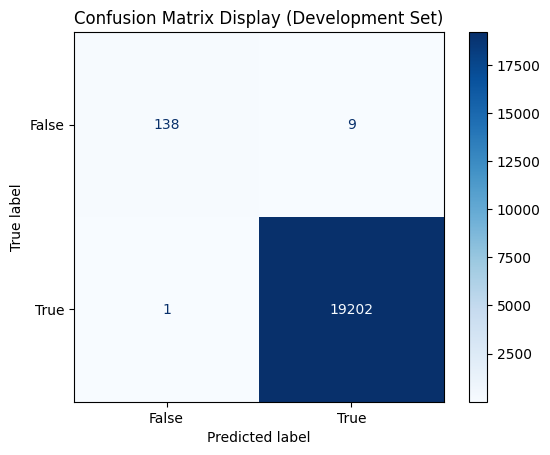

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ===== Model Evaluation on DEV Set =====
# Generate predictions on the development (validation) set
y_dev_pred = base_model.predict(X_dev)

# ===== Model Summary =====
# Sklearn models do not have .summary(); instead, print evaluation metrics
print("Model Evaluation Summary (Development Set)")
print("------------------------------------------")
print(classification_report(y_dev, y_dev_pred))  # Print precision, recall, f1-score, and accuracy

# ===== Confusion Matrix =====
cmat_dev = confusion_matrix(y_dev, y_dev_pred)  # Compute confusion matrix for dev set
print("Confusion Matrix (Development Set):")
print(cmat_dev)  # Print raw confusion matrix values

# ===== Confusion Matrix Visualization =====
cm_display_dev = ConfusionMatrixDisplay(confusion_matrix=cmat_dev, display_labels=[False, True])  # Initialize display
cm_display_dev.plot(cmap='Blues', values_format='d')  # Plot confusion matrix with blue color map
plt.title("Confusion Matrix Display (Development Set)")  # Set the title of the plot
plt.show()  # Show the plot
